In [1]:
#include <iostream>
int main()
{
  std::cout << "Hello world!\n";
  return 0;
}

Hello world!


In [1]:
%BC
w = 65
h = 25
x0 = -2.0
x1 = 1.0
y = -1
y1 = 1
dx = (x1 - x0) / w
dy = (y1 - y) / h
max_iter = 50

x0 += .5 * dx
y += .5 * dy

for (i = 0; i != h; ++i) {
  x = x0
  for (j = 0; j != w; ++j) {
    zr = x
    zi = y
    zr2 = zr * zr
    zi2 = zi * zi

    iter = 0

    while ((zr2 + zi2 < 4) && (iter < max_iter)) {
      zi = 2 * zr * zi + y;
      zr = zr2 - zi2 + x;
      zr2 = zr * zr
      zi2 = zi * zi
      iter = ++iter
    }

    if (iter == max_iter) {
      print "#"
    } else {
      print " "
    }
    x += dx
  }
  print "\n"
  y += dy
}

                                                                 
                                        #                        
                                      #####                      
                                      #####                      
                                   #  #######                    
                               ################  ##              
                               ##################                
                             #####################               
                             #######################             
                  # #####  #########################             
                ########## ########################              
                ###################################              
#################################################                
                ###################################              
                ########## ########################              
          

In [1]:
%C
#include <stdio.h>
int main()
{
  printf("Hello world!\n");
  return 0;
}

Hello world!


Note: No ".plot", ".print", or ".fourier" lines; no simulations run



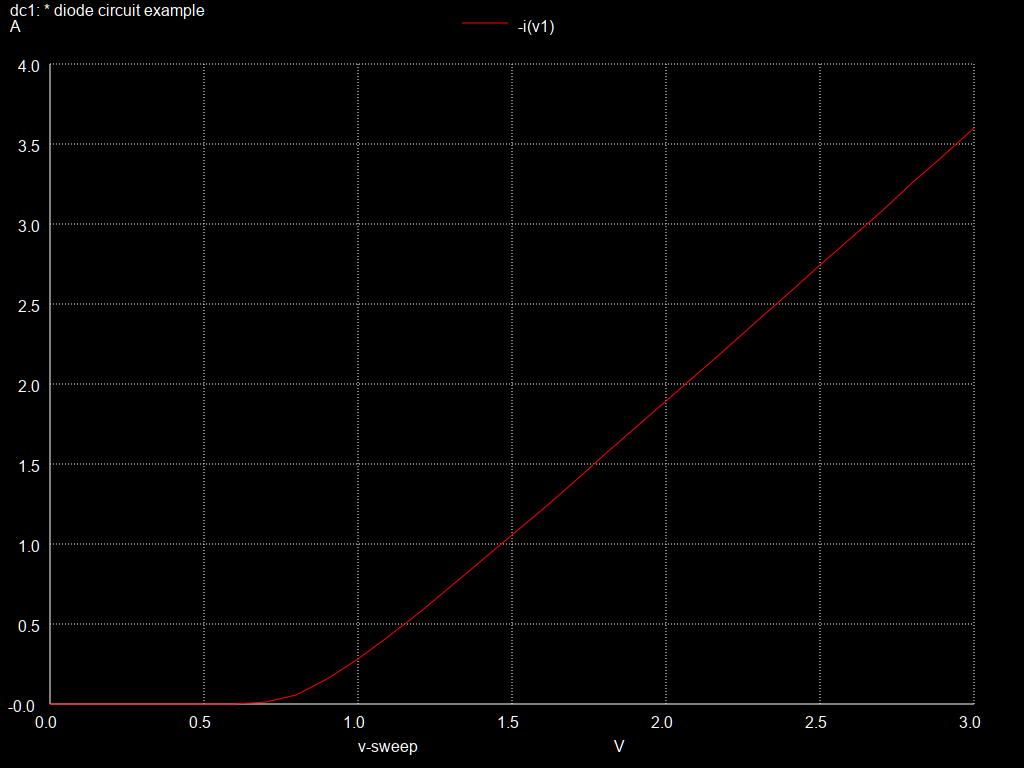

In [1]:
%NGSPICE
* Diode Circuit Example
V1 in 0 DC 10V
D1 in 0 1N4148
.model 1N4148 D IS=2.52e-9 RS=0.568 N=1.752 CJO=4.86p M=0.379 TT=20.3n

.control
dc V1 0 3 .1
set hcopydevtype=svg
hardcopy /dev/stdout -I(V1)
.endc

.end

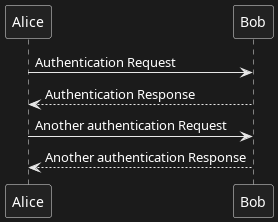

In [1]:
%PUML
@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: Another authentication Response
@enduml

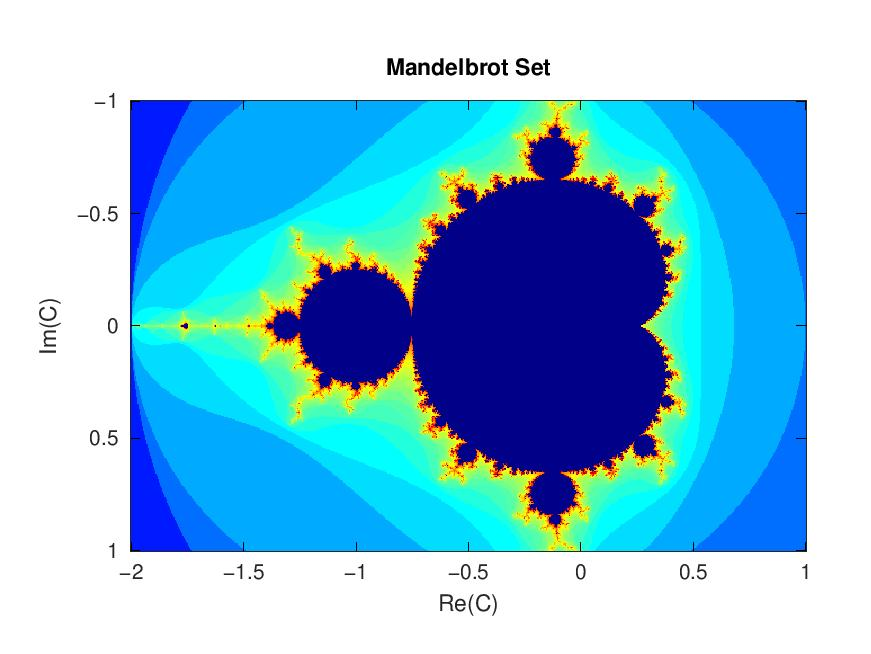

In [1]:
%OCTAVE
% Create a grid of points in the complex plane
x = linspace(-2, 1, 600);
y = linspace(-1, 1, 400);
[X, Y] = meshgrid(x, y);
C = X + Y*1i;

% Initialize the Mandelbrot set array and iteration parameters
M = zeros(size(C));
Z = zeros(size(C));
max_iter = 120;
escape_radius = 2;

% Iterate through the Mandelbrot function for each point
for iter = 1:max_iter
  Z = Z.^2 + C;
  M(abs(Z) > escape_radius & M == 0) = iter;
  Z(abs(Z) > escape_radius) = escape_radius;
end

% Apply logarithmic scaling for better contrast
M_log = log(1 + M);

% Create a colorful plot of the Mandelbrot set
warning('off', 'Octave:gnuplot-graphics');
fig = figure('visible', 'off');
colormap(jet(max_iter));
imagesc(x, y, M_log);
axis image;
xlabel('Re(C)');
ylabel('Im(C)');
title('Mandelbrot Set');

% Save the figure to stdout
temp_filename = [tempname(), '.jpg'];
saveas(fig, temp_filename);
fwrite(1, uint8(fileread(temp_filename)));
delete(temp_filename);